### Prepare the data

In [1]:
library(ggplot2)
library(readxl)
library(dplyr)
library(tidyverse)
library(gridExtra)
library(grid)
library(tidyr)
library(egg)
library(reshape2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [2]:
mydata <- read.csv("MIMICtable_100000.csv")
head(mydata)
names(mydata)

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,presumed_onset,died_in_hosp,died_within_48h_of_out_time,⋯,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,200003,7245486000,0,17639.83,0,0,7245590400,0,0,⋯,262.5000,0,0,6527.00,50,13617,520,-7090.000,3,1
2,1,200011,6898241400,1,30766.07,6,1,6898283700,0,0,⋯,198.1481,0,0,0.00,0,0,0,0.000,10,0
3,1,200012,5805732000,1,12049.22,0,0,5805734400,0,0,⋯,476.1905,0,0,0.00,0,0,0,0.000,7,3
4,1,200014,4264269300,0,30946.97,2,0,4264272000,0,0,⋯,447.5000,0,0,1300.00,1300,340,160,960.000,5,2
5,1,200030,5707825200,0,19793.59,6,0,5707929600,0,0,⋯,183.3333,0,0,9552.00,50,6830,540,2722.000,4,3
6,1,200033,7214122800,0,24524.75,5,0,7214227200,1,1,⋯,369.6667,0,0,10661.05,725,5746,360,4915.048,2,0


[1] "bloc"                                      
 [2] "icustayid"                                 
 [3] "charttime"                                 
 [4] "gender"                                    
 [5] "age"                                       
 [6] "elixhauser"                                
 [7] "re_admission"                              
 [8] "presumed_onset"                            
 [9] "died_in_hosp"                              
[10] "died_within_48h_of_out_time"               
[11] "mortality_90d"                             
[12] "delay_end_of_record_and_discharge_or_death"
[13] "Weight_kg"                                 
[14] "GCS"                                       
[15] "HR"                                        
[16] "SysBP"                                     
[17] "MeanBP"                                    
[18] "DiaBP"                                     
[19] "RR"                                        
[20] "SpO2"                                      
[21] "Temp_C"                                    
[22] "FiO2_1"                                    
[23] "Potassium"                                 
[24] "Sodium"                                    
[25] "Chloride"                                  
[26] "Glucose"                                   
[27] "BUN"                                       
[28] "Creatinine"                                
[29] "Magnesium"                                 
[30] "Calcium"                                   
[31] "Ionised_Ca"                                
[32] "CO2_mEqL"                                  
[33] "SGOT"                                      
[34] "SGPT"                                      
[35] "Total_bili"                                
[36] "Albumin"                                   
[37] "Hb"                                        
[38] "WBC_count"                                 
[39] "Platelets_count"                           
[40] "PTT"                                       
[41] "PT"                                        
[42] "INR"                                       
[43] "Arterial_pH"                               
[44] "paO2"                                      
[45] "paCO2"                                     
[46] "Arterial_BE"                               
[47] "HCO3"                                      
[48] "Arterial_lactate"                          
[49] "mechvent"                                  
[50] "Shock_Index"                               
[51] "PaO2_FiO2"                                 
[52] "median_dose_vaso"                          
[53] "max_dose_vaso"                             
[54] "input_total"                               
[55] "input_4hourly"                             
[56] "output_total"                              
[57] "output_4hourly"                            
[58] "cumulated_balance"                         
[59] "SOFA"                                      
[60] "SIRS"

In [3]:
mydata_sorted <- mydata %>% arrange(icustayid)
head(mydata_sorted)

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,presumed_onset,died_in_hosp,died_within_48h_of_out_time,⋯,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,200003,7245486000,0,17639.83,0,0,7245590400,0,0,⋯,262.5000,0,0,6527,50,13617,520,-7090,3,1
2,2,200003,7245500400,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6577,50,13982,365,-7405,5,2
3,3,200003,7245514800,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6627,50,14262,280,-7635,5,2
4,4,200003,7245529200,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6677,50,14602,340,-7925,5,1
5,5,200003,7245543600,0,17639.83,0,0,7245590400,0,0,⋯,1023.5000,0,0,6727,50,15142,540,-8415,3,2
6,6,200003,7245558000,0,17639.83,0,0,7245590400,0,0,⋯,517.8571,0,0,6747,20,15442,300,-8695,3,2


In [4]:
A=table(mydata_sorted$icustayid)
A=as.data.frame(A)
A

Var1,Freq
<fct>,<int>
200003,6
200011,6
200012,4
200014,6
200030,6
200033,6
200038,6
200047,2
200063,6


In [5]:
A1=A[which(A$Freq!=1),]
A1
notdrop=c(A1$Var1)

,Var1,Freq
,<fct>,<int>
1,200003,6
2,200011,6
3,200012,4
4,200014,6
5,200030,6
6,200033,6
7,200038,6
8,200047,2
9,200063,6


In [6]:
length(notdrop)

[1] 18519

In [7]:
max(A1$Freq)

[1] 6

In [8]:
min(A1$Freq)

[1] 2

In [9]:
mydata_final <- filter(mydata_sorted, mydata_sorted$icustayid %in% notdrop)
head(mydata_final)
dim(mydata_final)

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,presumed_onset,died_in_hosp,died_within_48h_of_out_time,⋯,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,200003,7245486000,0,17639.83,0,0,7245590400,0,0,⋯,262.5000,0,0,6527,50,13617,520,-7090,3,1
2,2,200003,7245500400,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6577,50,13982,365,-7405,5,2
3,3,200003,7245514800,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6627,50,14262,280,-7635,5,2
4,4,200003,7245529200,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6677,50,14602,340,-7925,5,1
5,5,200003,7245543600,0,17639.83,0,0,7245590400,0,0,⋯,1023.5000,0,0,6727,50,15142,540,-8415,3,2
6,6,200003,7245558000,0,17639.83,0,0,7245590400,0,0,⋯,517.8571,0,0,6747,20,15442,300,-8695,3,2


[1] 99635    60

In [10]:
mydata1=mydata_final[which(mydata_final$bloc=='1'),]
head(mydata1)
dim(mydata1)

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,presumed_onset,died_in_hosp,died_within_48h_of_out_time,⋯,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,200003,7245486000,0,17639.83,0,0,7245590400,0,0,⋯,262.5000,0,0,6527.00,50,13617,520,-7090.000,3,1
7,1,200011,6898241400,1,30766.07,6,1,6898283700,0,0,⋯,198.1481,0,0,0.00,0,0,0,0.000,10,0
13,1,200012,5805732000,1,12049.22,0,0,5805734400,0,0,⋯,476.1905,0,0,0.00,0,0,0,0.000,7,3
17,1,200014,4264269300,0,30946.97,2,0,4264272000,0,0,⋯,447.5000,0,0,1300.00,1300,340,160,960.000,5,2
23,1,200030,5707825200,0,19793.59,6,0,5707929600,0,0,⋯,183.3333,0,0,9552.00,50,6830,540,2722.000,4,3
29,1,200033,7214122800,0,24524.75,5,0,7214227200,1,1,⋯,369.6667,0,0,10661.05,725,5746,360,4915.048,2,0


[1] 18519    60

In [11]:
mydata2=mydata_final[which(mydata_final$bloc=='2'),]
head(mydata2)
dim(mydata2)

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,presumed_onset,died_in_hosp,died_within_48h_of_out_time,⋯,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2,2,200003,7245500400,0,17639.83,0,0,7245590400,0,0,⋯,210.0000,0,0,6577.00,50,13982,365,-7405.000,5,2
8,2,200011,6898255800,1,30766.07,6,1,6898283700,0,0,⋯,198.1481,0,0,0.00,0,460,460,-460.000,8,0
14,2,200012,5805746400,1,12049.22,0,0,5805734400,0,0,⋯,585.7143,0,0,0.00,0,0,0,0.000,7,2
18,2,200014,4264283700,0,30946.97,2,0,4264272000,0,0,⋯,453.7500,0,0,1620.00,320,585,245,1035.000,4,1
24,2,200030,5707839600,0,19793.59,6,0,5707929600,0,0,⋯,272.2222,0,0,9603.00,51,7555,725,2048.000,7,3
30,2,200033,7214137200,0,24524.75,5,0,7214227200,1,1,⋯,833.3333,0,0,11361.05,700,6216,470,5145.048,1,0


[1] 16316    60

In [12]:
mydata <- left_join(mydata2, mydata1, by = "icustayid")
names(mydata)

[1] "bloc.x"                                      
  [2] "icustayid"                                   
  [3] "charttime.x"                                 
  [4] "gender.x"                                    
  [5] "age.x"                                       
  [6] "elixhauser.x"                                
  [7] "re_admission.x"                              
  [8] "presumed_onset.x"                            
  [9] "died_in_hosp.x"                              
 [10] "died_within_48h_of_out_time.x"               
 [11] "mortality_90d.x"                             
 [12] "delay_end_of_record_and_discharge_or_death.x"
 [13] "Weight_kg.x"                                 
 [14] "GCS.x"                                       
 [15] "HR.x"                                        
 [16] "SysBP.x"                                     
 [17] "MeanBP.x"                                    
 [18] "DiaBP.x"                                     
 [19] "RR.x"                                        
 [20] "SpO2.x"                                      
 [21] "Temp_C.x"                                    
 [22] "FiO2_1.x"                                    
 [23] "Potassium.x"                                 
 [24] "Sodium.x"                                    
 [25] "Chloride.x"                                  
 [26] "Glucose.x"                                   
 [27] "BUN.x"                                       
 [28] "Creatinine.x"                                
 [29] "Magnesium.x"                                 
 [30] "Calcium.x"                                   
 [31] "Ionised_Ca.x"                                
 [32] "CO2_mEqL.x"                                  
 [33] "SGOT.x"                                      
 [34] "SGPT.x"                                      
 [35] "Total_bili.x"                                
 [36] "Albumin.x"                                   
 [37] "Hb.x"                                        
 [38] "WBC_count.x"                                 
 [39] "Platelets_count.x"                           
 [40] "PTT.x"                                       
 [41] "PT.x"                                        
 [42] "INR.x"                                       
 [43] "Arterial_pH.x"                               
 [44] "paO2.x"                                      
 [45] "paCO2.x"                                     
 [46] "Arterial_BE.x"                               
 [47] "HCO3.x"                                      
 [48] "Arterial_lactate.x"                          
 [49] "mechvent.x"                                  
 [50] "Shock_Index.x"                               
 [51] "PaO2_FiO2.x"                                 
 [52] "median_dose_vaso.x"                          
 [53] "max_dose_vaso.x"                             
 [54] "input_total.x"                               
 [55] "input_4hourly.x"                             
 [56] "output_total.x"                              
 [57] "output_4hourly.x"                            
 [58] "cumulated_balance.x"                         
 [59] "SOFA.x"                                      
 [60] "SIRS.x"                                      
 [61] "bloc.y"                                      
 [62] "charttime.y"                                 
 [63] "gender.y"                                    
 [64] "age.y"                                       
 [65] "elixhauser.y"                                
 [66] "re_admission.y"                              
 [67] "presumed_onset.y"                            
 [68] "died_in_hosp.y"                              
 [69] "died_within_48h_of_out_time.y"               
 [70] "mortality_90d.y"                             
 [71] "delay_end_of_record_and_discharge_or_death.y"
 [72] "Weight_kg.y"                                 
 [73] "GCS.y"                                       
 [74] "HR.y"                                        
 [75] "SysBP.y"                                     
 [76] "MeanBP.y"           

In [13]:
mydata_RL=select(mydata,
                 icustayid,
                 gender.x,
                 age.x,
                 Weight_kg.x,
                 GCS.x,
                 HR.x,
                 SysBP.x,
                 MeanBP.x,
                 DiaBP.x,
                 RR.x,
                 SpO2.x,
                 Temp_C.x,
                 FiO2_1.x,
                 Potassium.x,
                 Sodium.x,
                 Chloride.x,
                 Glucose.x,
                 BUN.x,
                 Creatinine.x,
                 Magnesium.x,
                 Calcium.x,
                 Ionised_Ca.x,
                 CO2_mEqL.x,
                 SGOT.x,
                 SGPT.x,
                 Total_bili.x,
                 Albumin.x,
                 Hb.x,
                 WBC_count.x,
                 Platelets_count.x,
                 PTT.x,
                 PT.x,
                 INR.x,
                 Arterial_pH.x,
                 paO2.x,
                 paCO2.x,
                 Arterial_BE.x,
                 HCO3.x,
                 Arterial_lactate.x,
                 mechvent.x,
                 Shock_Index.x,
                 PaO2_FiO2.x,
                 median_dose_vaso.x,
                 max_dose_vaso.x,
                 input_total.x,
                 input_4hourly.x,
                 output_total.x,
                 output_4hourly.x,
                 cumulated_balance.x,
                 SOFA.x,
                 SIRS.x,
                 mortality_90d.x,
                 GCS.y,
                 HR.y,
                 SysBP.y,
                 MeanBP.y,
                 DiaBP.y,
                 RR.y,
                 SpO2.y,
                 Temp_C.y,
                 FiO2_1.y,
                 Potassium.y,
                 Sodium.y,
                 Chloride.y,
                 Glucose.y,
                 BUN.y,
                 Creatinine.y,
                 Magnesium.y,
                 Calcium.y,
                 Ionised_Ca.y,
                 CO2_mEqL.y,
                 SGOT.y,
                 SGPT.y,
                 Total_bili.y,
                 Albumin.y,
                 Hb.y,
                 WBC_count.y,
                 Platelets_count.y,
                 PTT.y,
                 PT.y,
                 INR.y,
                 Arterial_pH.y,
                 paO2.y,
                 paCO2.y,
                 Arterial_BE.y,
                 HCO3.y,
                 Arterial_lactate.y,
                 mechvent.y,
                 Shock_Index.y,
                 PaO2_FiO2.y,
                 median_dose_vaso.y,
                 max_dose_vaso.y,
                 input_total.y,
                 input_4hourly.y,
                 output_total.y,
                 output_4hourly.y,
                 cumulated_balance.y,
                 SOFA.y,
                 SIRS.y,
                 mortality_90d.y)
head(mydata_RL)

,icustayid,gender.x,age.x,Weight_kg.x,GCS.x,HR.x,SysBP.x,MeanBP.x,DiaBP.x,RR.x,⋯,median_dose_vaso.y,max_dose_vaso.y,input_total.y,input_4hourly.y,output_total.y,output_4hourly.y,cumulated_balance.y,SOFA.y,SIRS.y,mortality_90d.y
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,200003,0,17639.83,78.7,15.00000,68.33333,103.8333,70.33333,55.33333,22.33333,⋯,0,0,6527.00,50,13617,520,-7090.000,3,1,1
2,200011,1,30766.07,101.4,15.00000,74.60000,135.4000,70.60000,38.20000,18.80000,⋯,0,0,0.00,0,0,0,0.000,10,0,0
3,200012,1,12049.22,51.2,15.00000,103.50000,99.5000,78.00000,72.50000,18.00000,⋯,0,0,0.00,0,0,0,0.000,7,3,0
4,200014,0,30946.97,87.7,7.00000,68.50000,119.2500,77.62500,61.25000,9.87500,⋯,0,0,1300.00,1300,340,160,960.000,5,2,1
5,200030,0,19793.59,89.1,12.83333,112.50000,142.6667,97.16667,75.83333,25.16667,⋯,0,0,9552.00,50,6830,540,2722.000,4,3,0
6,200033,0,24524.75,73.0,15.00000,71.80000,127.8571,92.80000,72.57143,15.20000,⋯,0,0,10661.05,725,5746,360,4915.048,2,0,1


In [14]:
colnames(mydata_RL)=c('icustayid',
                      'gender',
                      'age',
                      'Weight',
                      'Stage2_GCS',
                      'Stage2_HR',
                      'Stage2_SysBP',
                      'Stage2_MeanBP',
                      'Stage2_DiaBP',
                      'Stage2_RR',
                      'Stage2_SpO2',
                      'Stage2_Temp_C',
                      'Stage2_FiO2',
                      'Stage2_Potassium',
                      'Stage2_Sodium',
                      'Stage2_Chloride',
                      'Stage2_Glucose',
                      'Stage2_BUN',
                      'Stage2_Creatinine',
                      'Stage2_Magnesium',
                      'Stage2_Calcium',
                      'Stage2_Ionised_Ca',
                      'Stage2_CO2_mEqL',
                      'Stage2_SGOT',
                      'Stage2_SGPT',
                      'Stage2_Total_bili',
                      'Stage2_Albumin',
                      'Stage2_Hb',
                      'Stage2_WBC_count',
                      'Stage2_Platelets_count',
                      'Stage2_PTT',
                      'Stage2_PT',
                      'Stage2_INR',
                      'Stage2_Arterial_pH',
                      'Stage2_paO2',
                      'Stage2_paCO2',
                      'Stage2_Arterial_BE',
                      'Stage2_HCO3',
                      'Stage2_Arterial_lactate',
                      'Stage2_mechvent',
                      'Stage2_Shock_Index',
                      'Stage2_PaO2_FiO2',
                      'Stage2_median_dose_vaso',
                      'Stage2_max_dose_vaso',
                      'Stage2_input_total',
                      'Stage2_input_4hourly',
                      'Stage2_output_total',
                      'Stage2_output_4hourly',
                      'Stage2_cumulated_balance',
                      'Stage2_SOFA',
                      'Stage2_SIRS',
                      'Stage2_mortality_90d',
                      'Stage1_GCS',
                      'Stage1_HR',
                      'Stage1_SysBP',
                      'Stage1_MeanBP',
                      'Stage1_DiaBP',
                      'Stage1_RR',
                      'Stage1_SpO2',
                      'Stage1_Temp_C',
                      'Stage1_FiO2',
                      'Stage1_Potassium',
                      'Stage1_Sodium',
                      'Stage1_Chloride',
                      'Stage1_Glucose',
                      'Stage1_BUN',
                      'Stage1_Creatinine',
                      'Stage1_Magnesium',
                      'Stage1_Calcium',
                      'Stage1_Ionised_Ca',
                      'Stage1_CO2_mEqL',
                      'Stage1_SGOT',
                      'Stage1_SGPT',
                      'Stage1_Total_bili',
                      'Stage1_Albumin',
                      'Stage1_Hb',
                      'Stage1_WBC_count',
                      'Stage1_Platelets_count',
                      'Stage1_PTT',
                      'Stage1_PT',
                      'Stage1_INR',
                      'Stage1_Arterial_pH',
                      'Stage1_paO2',
                      'Stage1_paCO2',
                      'Stage1_Arterial_BE',
                      'Stage1_HCO3',
                      'Stage1_Arterial_lactate',
                      'Stage1_mechvent',
                      'Stage1_Shock_Index',
                      'Stage1_PaO2_FiO2',
                      'Stage1_median_dose_vaso',
                      'Stage1_max_dose_vaso',
                      'Stage1_input_total',
                      'Stage1_input_4hourly',
                      'Stage1_output_total',
                      'Stage1_output_4hourly',
                      'Stage1_cumulated_balance',
                      'Stage1_SOFA',
                      'Stage1_SIRS',
                      'Stage1_mortality_90d')
head(mydata_RL)

,icustayid,gender,age,Weight,Stage2_GCS,Stage2_HR,Stage2_SysBP,Stage2_MeanBP,Stage2_DiaBP,Stage2_RR,⋯,Stage1_median_dose_vaso,Stage1_max_dose_vaso,Stage1_input_total,Stage1_input_4hourly,Stage1_output_total,Stage1_output_4hourly,Stage1_cumulated_balance,Stage1_SOFA,Stage1_SIRS,Stage1_mortality_90d
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,200003,0,17639.83,78.7,15.00000,68.33333,103.8333,70.33333,55.33333,22.33333,⋯,0,0,6527.00,50,13617,520,-7090.000,3,1,1
2,200011,1,30766.07,101.4,15.00000,74.60000,135.4000,70.60000,38.20000,18.80000,⋯,0,0,0.00,0,0,0,0.000,10,0,0
3,200012,1,12049.22,51.2,15.00000,103.50000,99.5000,78.00000,72.50000,18.00000,⋯,0,0,0.00,0,0,0,0.000,7,3,0
4,200014,0,30946.97,87.7,7.00000,68.50000,119.2500,77.62500,61.25000,9.87500,⋯,0,0,1300.00,1300,340,160,960.000,5,2,1
5,200030,0,19793.59,89.1,12.83333,112.50000,142.6667,97.16667,75.83333,25.16667,⋯,0,0,9552.00,50,6830,540,2722.000,4,3,0
6,200033,0,24524.75,73.0,15.00000,71.80000,127.8571,92.80000,72.57143,15.20000,⋯,0,0,10661.05,725,5746,360,4915.048,2,0,1


In [15]:
### Calculate the proportion of missing data in each column and row
pMiss=function(x){sum(is.na(x))/length(x)*100}
apply(mydata_RL,2,pMiss)

icustayid                   gender                      age 
                       0                        0                        0 
                  Weight               Stage2_GCS                Stage2_HR 
                       0                        0                        0 
            Stage2_SysBP            Stage2_MeanBP             Stage2_DiaBP 
                       0                        0                        0 
               Stage2_RR              Stage2_SpO2            Stage2_Temp_C 
                       0                        0                        0 
             Stage2_FiO2         Stage2_Potassium            Stage2_Sodium 
                       0                        0                        0 
         Stage2_Chloride           Stage2_Glucose               Stage2_BUN 
                       0                        0                        0 
       Stage2_Creatinine         Stage2_Magnesium           Stage2_Calcium 
                       0                        0                        0 
       Stage2_Ionised_Ca          Stage2_CO2_mEqL              Stage2_SGOT 
                       0                        0                        0 
             Stage2_SGPT        Stage2_Total_bili           Stage2_Albumin 
                       0                        0                        0 
               Stage2_Hb         Stage2_WBC_count   Stage2_Platelets_count 
                       0                        0                        0 
              Stage2_PTT                Stage2_PT               Stage2_INR 
                       0                        0                        0 
      Stage2_Arterial_pH              Stage2_paO2             Stage2_paCO2 
                       0                        0                        0 
      Stage2_Arterial_BE              Stage2_HCO3  Stage2_Arterial_lactate 
                       0                        0                        0 
         Stage2_mechvent       Stage2_Shock_Index         Stage2_PaO2_FiO2 
                       0                        0                        0 
 Stage2_median_dose_vaso     Stage2_max_dose_vaso       Stage2_input_total 
                       0                        0                        0 
    Stage2_input_4hourly      Stage2_output_total    Stage2_output_4hourly 
                       0                        0                        0 
Stage2_cumulated_balance              Stage2_SOFA              Stage2_SIRS 
                       0                        0                        0 
    Stage2_mortality_90d               Stage1_GCS                Stage1_HR 
                       0                        0                        0 
            Stage1_SysBP            Stage1_MeanBP             Stage1_DiaBP 
                       0                        0                        0 
               Stage1_RR              Stage1_SpO2            Stage1_Temp_C 
                       0                        0                        0 
             Stage1_FiO2         Stage1_Potassium            Stage1_Sodium 
                       0                        0                        0 
         Stage1_Chloride           Stage1_Glucose               Stage1_BUN 
                       0                        0                        0 
       Stage1_Creatinine         Stage1_Magnesium           Stage1_Calcium 
                       0                        0                        0 
       Stage1_Ionised_Ca          Stage1_CO2_mEqL              Stage1_SGOT 
                       0                        0                        0 
             Stage1_SGPT        Stage1_Total_bili           Stage1_Albumin 
                       0                        0                        0 
               Stage1_Hb         Stage1_WBC_count   Stage1_Platelets_count 
                       0                        0                        0 
              Stage1_PTT                Stage1_PT              

In [16]:
summary(mydata_RL)

   icustayid          gender            age            Weight      
 Min.   :200003   Min.   :0.0000   Min.   : 6582   Min.   :  0.00  
 1st Qu.:225064   1st Qu.:0.0000   1st Qu.:19544   1st Qu.: 66.60  
 Median :249998   Median :0.0000   Median :24118   Median : 79.00  
 Mean   :249854   Mean   :0.4406   Mean   :23577   Mean   : 82.75  
 3rd Qu.:274667   3rd Qu.:1.0000   3rd Qu.:28445   3rd Qu.: 94.70  
 Max.   :299995   Max.   :1.0000   Max.   :33384   Max.   :295.00  
   Stage2_GCS      Stage2_HR       Stage2_SysBP   Stage2_MeanBP    
 Min.   : 3.00   Min.   : 25.62   Min.   : 44.0   Min.   :  33.67  
 1st Qu.:10.50   1st Qu.: 75.11   1st Qu.:105.8   1st Qu.:  69.17  
 Median :14.80   Median : 86.00   Median :118.2   Median :  77.06  
 Mean   :12.42   Mean   : 87.20   Mean   :120.7   Mean   :  78.93  
 3rd Qu.:15.00   3rd Qu.: 98.25   3rd Qu.:133.5   3rd Qu.:  86.67  
 Max.   :15.00   Max.   :171.10   Max.   :246.2   Max.   :1617.12  
  Stage2_DiaBP       Stage2_RR      Stage2_SpO2 

In [17]:
str(mydata_RL)

'data.frame':	16316 obs. of  100 variables:
 $ icustayid               : int  200003 200011 200012 200014 200030 200033 200038 200047 200063 200065 ...
 $ gender                  : int  0 1 1 0 0 0 0 0 0 1 ...
 $ age                     : num  17640 30766 12049 30947 19794 ...
 $ Weight                  : num  78.7 101.4 51.2 87.7 89.1 ...
 $ Stage2_GCS              : num  15 15 15 7 12.8 ...
 $ Stage2_HR               : num  68.3 74.6 103.5 68.5 112.5 ...
 $ Stage2_SysBP            : num  103.8 135.4 99.5 119.2 142.7 ...
 $ Stage2_MeanBP           : num  70.3 70.6 78 77.6 97.2 ...
 $ Stage2_DiaBP            : num  55.3 38.2 72.5 61.2 75.8 ...
 $ Stage2_RR               : num  22.33 18.8 18 9.88 25.17 ...
 $ Stage2_SpO2             : num  98.3 99 96 98.4 95.5 ...
 $ Stage2_Temp_C           : num  37.8 37.4 36.7 36 36.7 ...
 $ Stage2_FiO2             : num  0.4 0.3 0.21 0.4 0.36 ...
 $ Stage2_Potassium        : num  3.75 5.1 3.5 4.1 4.2 3.82 4.4 3.5 4 3.3 ...
 $ Stage2_Sodium           

### Reinforcement_learning_in_clinical_medicine

In [18]:
library(DynTxRegime)

Loading required package: modelObj



In [19]:
mydata_RL$A2=ifelse(mydata_RL$Stage2_input_4hourly>=median(mydata_RL$Stage2_input_4hourly),1,0)
mydata_RL$A2

[1] 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0
   [37] 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0
   [73] 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
  [109] 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0
  [145] 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
  [181] 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1
  [217] 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1
  [253] 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1
  [289] 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0
  [325] 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1
  [361] 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
  [397] 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0
  [433] 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
  [469] 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0
  [505] 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1
  [541] 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0
  [577] 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0
  [613] 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
  [649] 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
  [685] 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0
  [721] 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
  [757] 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1
  [793] 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0
  [829] 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
  [865] 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
  [901] 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
  [937] 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0
  [973] 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 [1009] 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 [1045] 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0
 [1081] 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 [1117] 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1
 [1153] 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 [1189] 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1
 [1225] 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0
 [1261] 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 [1297] 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 [1333] 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0
 [1369] 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 [1405] 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 [1441] 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 [1477] 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 [1513] 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 [1549] 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 [1585] 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 [1621] 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 [1657] 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1
 [1693] 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 [1729] 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1
 [1765] 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1
 [18

In [25]:
moMain <- buildModelObj(model = ~ Stage1_GCS+
                      Stage1_HR+
                      Stage1_SysBP+
                      Stage1_MeanBP+
                      Stage1_DiaBP+
                      Stage1_RR+
                      Stage1_SpO2+
                      Stage1_Temp_C+
                      Stage1_FiO2+
                      Stage1_Potassium+
                      Stage1_Sodium+
                      Stage1_Chloride+
                      Stage1_Glucose+
                      Stage1_BUN+
                      Stage1_Creatinine+
                      Stage1_Magnesium+
                      Stage1_Calcium+
                      Stage1_Ionised_Ca+
                      Stage1_CO2_mEqL+
                      Stage1_SGOT+
                      Stage1_SGPT+
                      Stage1_Total_bili+
                      Stage1_Albumin+
                      Stage1_Hb+
                      Stage1_WBC_count+
                      Stage1_Platelets_count+
                      Stage1_PTT+
                      Stage1_PT+
                      Stage1_INR+
                      Stage1_Arterial_pH+
                      Stage1_paO2+
                      Stage1_paCO2+
                      Stage1_Arterial_BE+
                      Stage1_HCO3+
                      Stage1_Arterial_lactate+
                      Stage1_mechvent+
                      Stage1_Shock_Index+
                      Stage1_PaO2_FiO2+
                      Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2, 
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [27]:
moCont <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [28]:
y=mydata_RL[,'Stage2_mortality_90d']
y

[1] 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
   [37] 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0
  [109] 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [145] 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
  [181] 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
  [217] 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0
  [253] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  [325] 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
  [361] 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [397] 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
  [433] 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
  [505] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
  [541] 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
  [613] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
  [649] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  [685] 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0
  [721] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [757] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
  [793] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
  [865] 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [937] 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
  [973] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 [1009] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 [1045] 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 [1081] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 [1117] 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 [1225] 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [1261] 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 [1297] 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 [1333] 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 [1369] 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 [1405] 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 [1477] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 [1513] 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 [1549] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 [1693] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 [1765] 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [18

In [29]:
mydata_RL$A2=as.factor(mydata_RL$A2)

In [30]:
fitSS <- qLearn(moMain = moMain,
                moCont = moCont,
                data = mydata_RL, 
                response = y,
                txName = "A2")

First step of the Q-Learning Algorithm.

Outcome regression.
Combined outcome regression model: ~ Stage1_GCS+Stage1_HR+Stage1_SysBP+Stage1_MeanBP+Stage1_DiaBP+Stage1_RR+Stage1_SpO2+Stage1_Temp_C+Stage1_FiO2+Stage1_Potassium+Stage1_Sodium+Stage1_Chloride+Stage1_Glucose+Stage1_BUN+Stage1_Creatinine+Stage1_Magnesium+Stage1_Calcium+Stage1_Ionised_Ca+Stage1_CO2_mEqL+Stage1_SGOT+Stage1_SGPT+Stage1_Total_bili+Stage1_Albumin+Stage1_Hb+Stage1_WBC_count+Stage1_Platelets_count+Stage1_PTT+Stage1_PT+Stage1_INR+Stage1_Arterial_pH+Stage1_paO2+Stage1_paCO2+Stage1_Arterial_BE+Stage1_HCO3+Stage1_Arterial_lactate+Stage1_mechvent+Stage1_Shock_Index+Stage1_PaO2_FiO2+Stage2_GCS+Stage2_HR+Stage2_SysBP+Stage2_MeanBP+Stage2_DiaBP+Stage2_RR+Stage2_SpO2+Stage2_Temp_C+Stage2_FiO2+Stage2_Potassium+Stage2_Sodium+Stage2_Chloride+Stage2_Glucose+Stage2_BUN+Stage2_Creatinine+Stage2_Magnesium+Stage2_Calcium+Stage2_Ionised_Ca+Stage2_CO2_mEqL+Stage2_SGOT+Stage2_SGPT+Stage2_Total_bili+Stage2_Albumin+Stage2_Hb+Stage2_WBC_co

In [31]:
A2Qlearn <- optTx(fitSS)$optimalTx

In [32]:
DTRstep(fitSS)

Q-Learning: step 1 


In [33]:
# Plots if defined by outcome regression method
dev.new()
par(mfrow = c(2,4))
plot(fitSS)
plot(fitSS, suppress = TRUE)

In [34]:
# Show main results of method
show(fitSS)

Q-Learning: step 1 
Outcome Regression Analysis
Combined 

Call:  glm(formula = YinternalY ~ Stage1_GCS + Stage1_HR + Stage1_SysBP + 
    Stage1_MeanBP + Stage1_DiaBP + Stage1_RR + Stage1_SpO2 + 
    Stage1_Temp_C + Stage1_FiO2 + Stage1_Potassium + Stage1_Sodium + 
    Stage1_Chloride + Stage1_Glucose + Stage1_BUN + Stage1_Creatinine + 
    Stage1_Magnesium + Stage1_Calcium + Stage1_Ionised_Ca + Stage1_CO2_mEqL + 
    Stage1_SGOT + Stage1_SGPT + Stage1_Total_bili + Stage1_Albumin + 
    Stage1_Hb + Stage1_WBC_count + Stage1_Platelets_count + Stage1_PTT + 
    Stage1_PT + Stage1_INR + Stage1_Arterial_pH + Stage1_paO2 + 
    Stage1_paCO2 + Stage1_Arterial_BE + Stage1_HCO3 + Stage1_Arterial_lactate + 
    Stage1_mechvent + Stage1_Shock_Index + Stage1_PaO2_FiO2 + 
    Stage2_GCS + Stage2_HR + Stage2_SysBP + Stage2_MeanBP + Stage2_DiaBP + 
    Stage2_RR + Stage2_SpO2 + Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + 
    Stage2_Sodium + Stage2_Chloride + Stage2_Glucose + Stage2_BUN + 
    

In [35]:
# Show summary results of method
summary(fitSS)

$outcome
$outcome$Combined

Call:
glm(formula = YinternalY ~ Stage1_GCS + Stage1_HR + Stage1_SysBP + 
    Stage1_MeanBP + Stage1_DiaBP + Stage1_RR + Stage1_SpO2 + 
    Stage1_Temp_C + Stage1_FiO2 + Stage1_Potassium + Stage1_Sodium + 
    Stage1_Chloride + Stage1_Glucose + Stage1_BUN + Stage1_Creatinine + 
    Stage1_Magnesium + Stage1_Calcium + Stage1_Ionised_Ca + Stage1_CO2_mEqL + 
    Stage1_SGOT + Stage1_SGPT + Stage1_Total_bili + Stage1_Albumin + 
    Stage1_Hb + Stage1_WBC_count + Stage1_Platelets_count + Stage1_PTT + 
    Stage1_PT + Stage1_INR + Stage1_Arterial_pH + Stage1_paO2 + 
    Stage1_paCO2 + Stage1_Arterial_BE + Stage1_HCO3 + Stage1_Arterial_lactate + 
    Stage1_mechvent + Stage1_Shock_Index + Stage1_PaO2_FiO2 + 
    Stage2_GCS + Stage2_HR + Stage2_SysBP + Stage2_MeanBP + Stage2_DiaBP + 
    Stage2_RR + Stage2_SpO2 + Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + 
    Stage2_Sodium + Stage2_Chloride + Stage2_Glucose + Stage2_BUN + 
    Stage2_Creatinine + Stage2_Magne

In [37]:
moPropen <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2, 
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [38]:
library(rpart)

In [39]:
moClass <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                         solver.method = 'rpart',
                         solver.args = list(method="class"),
                         predict.args = list(type='class'))

In [40]:
fitSS_IPW <- optimalClass(moPropen = moPropen, 
                          moClass = moClass,
                          data = mydata_RL, 
                          response = y,
                          txName = 'A2')

IPW value estimator


First step of the Classification Algorithm.

Classification Perspective.




Propensity for treatment regression.
Regression analysis for moPropen:

Call:  glm(formula = YinternalY ~ Stage2_GCS + Stage2_HR + Stage2_SysBP + 
    Stage2_MeanBP + Stage2_DiaBP + Stage2_RR + Stage2_SpO2 + 
    Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + Stage2_Sodium + 
    Stage2_Chloride + Stage2_Glucose + Stage2_BUN + Stage2_Creatinine + 
    Stage2_Magnesium + Stage2_Calcium + Stage2_Ionised_Ca + Stage2_CO2_mEqL + 
    Stage2_SGOT + Stage2_SGPT + Stage2_Total_bili + Stage2_Albumin + 
    Stage2_Hb + Stage2_WBC_count + Stage2_Platelets_count + Stage2_PTT + 
    Stage2_PT + Stage2_INR + Stage2_Arterial_pH + Stage2_paO2 + 
    Stage2_paCO2 + Stage2_Arterial_BE + Stage2_HCO3 + Stage2_Arterial_lactate + 
    Stage2_mechvent + Stage2_Shock_Index + Stage2_PaO2_FiO2, 
    family = "binomial", data = data)

Coefficients:
            (Intercept)               Stage2_GCS                Stage2_HR  
              7.170e+00                1.185e-02                3.689e-04  
           

In [41]:
library(rpart.plot)

Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


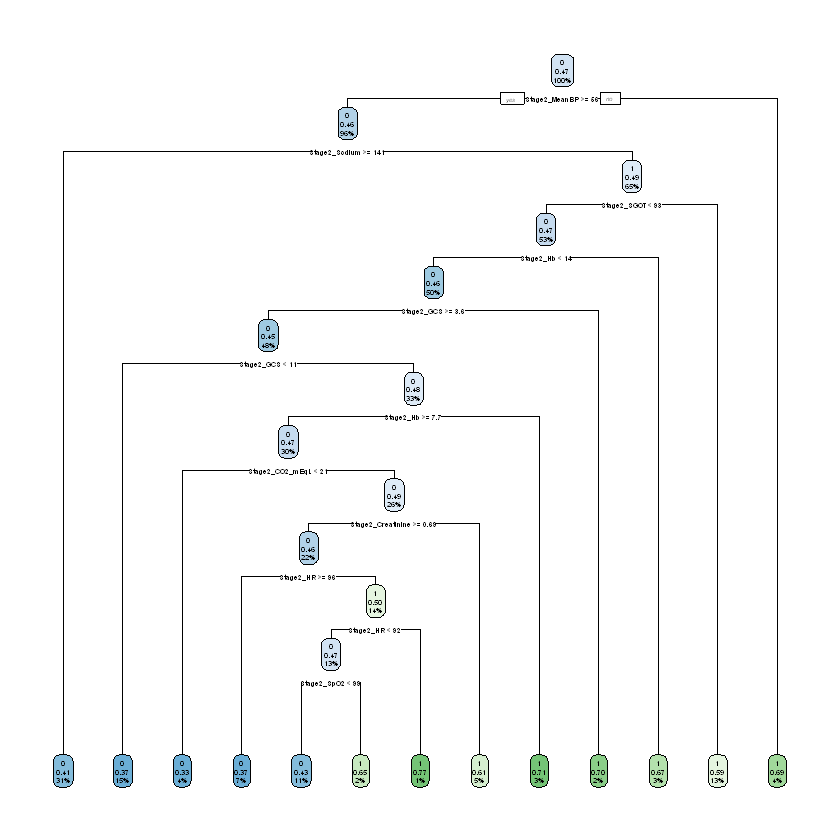

In [42]:
rpart.plot(classif(object = fitSS_IPW))

In [43]:
A2IPW <- optTx(fitSS_IPW)$optimalTx

In [44]:
moMain <- buildModelObj(model = ~ Stage1_GCS+
                      Stage1_HR+
                      Stage1_SysBP+
                      Stage1_MeanBP+
                      Stage1_DiaBP+
                      Stage1_RR+
                      Stage1_SpO2+
                      Stage1_Temp_C+
                      Stage1_FiO2+
                      Stage1_Potassium+
                      Stage1_Sodium+
                      Stage1_Chloride+
                      Stage1_Glucose+
                      Stage1_BUN+
                      Stage1_Creatinine+
                      Stage1_Magnesium+
                      Stage1_Calcium+
                      Stage1_Ionised_Ca+
                      Stage1_CO2_mEqL+
                      Stage1_SGOT+
                      Stage1_SGPT+
                      Stage1_Total_bili+
                      Stage1_Albumin+
                      Stage1_Hb+
                      Stage1_WBC_count+
                      Stage1_Platelets_count+
                      Stage1_PTT+
                      Stage1_PT+
                      Stage1_INR+
                      Stage1_Arterial_pH+
                      Stage1_paO2+
                      Stage1_paCO2+
                      Stage1_Arterial_BE+
                      Stage1_HCO3+
                      Stage1_Arterial_lactate+
                      Stage1_mechvent+
                      Stage1_Shock_Index+
                      Stage1_PaO2_FiO2+
                      Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [45]:
moCont <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [46]:
fitSS_AIPW <- optimalClass(moPropen = moPropen, 
                           moMain = moMain, 
                           moCont = moCont,
                           moClass = moClass,
                           data = mydata_RL, 
                           response = y,
                           txName = 'A2')

AIPW value estimator


First step of the Classification Algorithm.

Classification Perspective.




Propensity for treatment regression.
Regression analysis for moPropen:

Call:  glm(formula = YinternalY ~ Stage2_GCS + Stage2_HR + Stage2_SysBP + 
    Stage2_MeanBP + Stage2_DiaBP + Stage2_RR + Stage2_SpO2 + 
    Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + Stage2_Sodium + 
    Stage2_Chloride + Stage2_Glucose + Stage2_BUN + Stage2_Creatinine + 
    Stage2_Magnesium + Stage2_Calcium + Stage2_Ionised_Ca + Stage2_CO2_mEqL + 
    Stage2_SGOT + Stage2_SGPT + Stage2_Total_bili + Stage2_Albumin + 
    Stage2_Hb + Stage2_WBC_count + Stage2_Platelets_count + Stage2_PTT + 
    Stage2_PT + Stage2_INR + Stage2_Arterial_pH + Stage2_paO2 + 
    Stage2_paCO2 + Stage2_Arterial_BE + Stage2_HCO3 + Stage2_Arterial_lactate + 
    Stage2_mechvent + Stage2_Shock_Index + Stage2_PaO2_FiO2, 
    family = "binomial", data = data)

Coefficients:
            (Intercept)               Stage2_GCS                Stage2_HR  
              7.170e+00                1.185e-02                3.689e-04  
           

Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


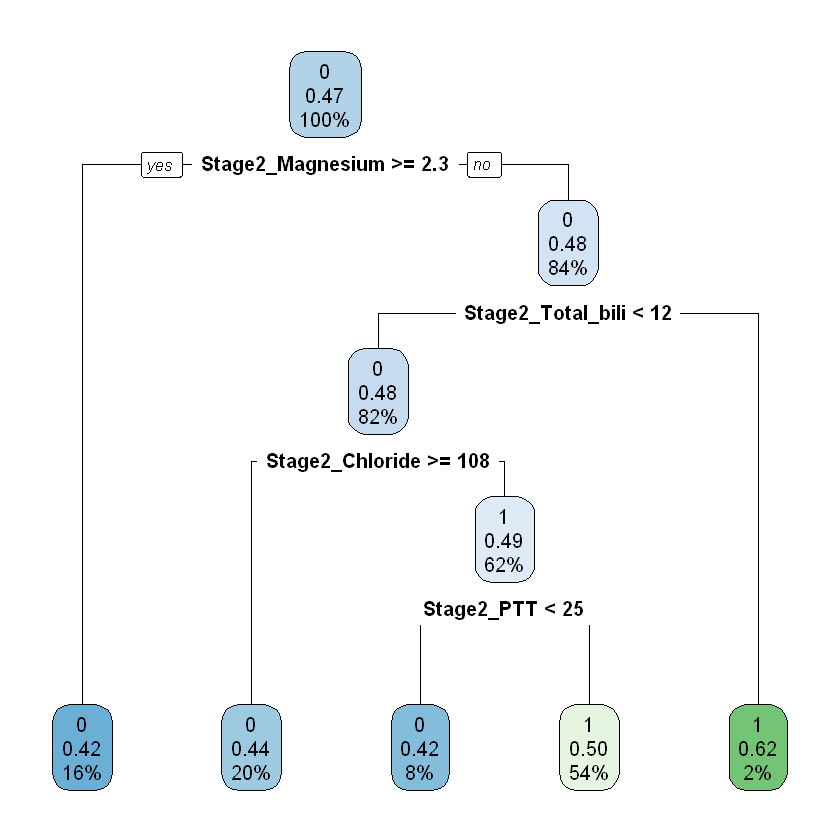

In [47]:
rpart.plot(classif(object = fitSS_AIPW))